# Sports Supplement Analysis



In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Sports_Supplements.csv')

# Initial inspection
print(df.head())


    supplement                                           alt name  \
0         AAKG                     L-arginine alpha-ketoglutarate   
1         AAKG                     L-arginine alpha-ketoglutarate   
2  Baking soda    Bicarbonate of soda, sodium bicarbonate, NaHCO3   
3        BCAAs  branched-chain amino acids, leucine, isoleucin...   
4        BCAAs  branched-chain amino acids, leucine, isoleucin...   

   evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong   \
0                                                1.0                                                               
1                                                0.0                                                               
2                                                5.0                                                               
3                                                4.0                                                               
4    

In [743]:
#check infos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 46 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   supplement                                                                                                     96 non-null     object 
 1   alt name                                                                                                       51 non-null     object 
 2   evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong   96 non-null     float64
 3   Claimed improved aspect of fitness                                                                             96 non-null     object 
 4   fitness category                                    

In [745]:
#check descriptive statistics 
print(df.describe())

       evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong   \
count                                          96.000000                                                               
mean                                            1.578125                                                               
std                                             1.665957                                                               
min                                             0.000000                                                               
25%                                             0.000000                                                               
50%                                             1.000000                                                               
75%                                             2.250000                                                               
max                                     

## Data Cleaning

In [748]:
#I can see I will need to do some data cleaning, and I've found interesting information about the evidence level, which is what I was looking for

# Data Cleaning

# Check for missing values
print(df.isnull().sum())

supplement                                                                                                        0
alt name                                                                                                         45
evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong      0
Claimed improved aspect of fitness                                                                                0
fitness category                                                                                                  0
sport or exercise type tested                                                                                     0
OTW                                                                                                              68
popularity                                                                                                        0
number of studies examined                                              

In [750]:
# I will clean column names (removing spaces and special characters), which will make our job easier.

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print(df.head(10))

       supplement                                           alt_name  \
0            AAKG                     L-arginine alpha-ketoglutarate   
1            AAKG                     L-arginine alpha-ketoglutarate   
2     Baking soda    Bicarbonate of soda, sodium bicarbonate, NaHCO3   
3           BCAAs  branched-chain amino acids, leucine, isoleucin...   
4           BCAAs  branched-chain amino acids, leucine, isoleucin...   
5           BCAAs  branched-chain amino acids, leucine, isoleucin...   
6           BCAAs  branched-chain amino acids, leucine, isoleucin...   
7           BCAAs  branched-chain amino acids, leucine, isoleucin...   
8  Beetroot juice                                                NaN   
9    Beta alanine                                                NaN   

   evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong  \
0                                                1.0                                        

In [752]:
list(df.columns.values)


['supplement',
 'alt_name',
 'evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong',
 'claimed_improved_aspect_of_fitness',
 'fitness_category',
 'sport_or_exercise_type_tested',
 'otw',
 'popularity',
 'number_of_studies_examined',
 'number_of_citations',
 'efficacy',
 'notes',
 'exclude',
 'unnamed:_13',
 'cochrane_systematic_review',
 'other_international_review_board_or_metastudy',
 'no._of_studies_in_cochrane_metastudy',
 'no._of_studies_in_metastudy',
 'year(s)_of_metastudy',
 'no._of_individual_studies_/_reviews',
 'n_positive_studies_/_trials',
 '%_positive_studies/_trials',
 'main_study_source',
 'link_to_main_individual_study',
 'unnamed:_24',
 'link_to_individual_study',
 'link_to_individual_study.1',
 'link_to_individual_study.2',
 'link_to_individual_study.3',
 'link_to_individual_study.4',
 'link_to_individual_study.5',
 'link_to_individual_study.6',
 'link_to_individual_study.7',
 'link_to_individual_study.8',
 'lin

In [754]:

# Convert evidence level to numeric (some might be strings)
df['evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong'] = pd.to_numeric(df['evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong'], errors='coerce')

In [756]:
print(df['evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong'].head(10))

0    1.0
1    0.0
2    5.0
3    4.0
4    3.0
5    1.0
6    0.0
7    6.0
8    4.0
9    1.0
Name: evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong, dtype: float64


In [758]:
print(df['%_positive_studies/_trials'].head(10))

0    100.00%
1      0.00%
2     64.29%
3    100.00%
4     50.00%
5    100.00%
6      0.00%
7    100.00%
8    100.00%
9     25.00%
Name: %_positive_studies/_trials, dtype: object


In [760]:
df['%_positive_studies/_trials'] = df['%_positive_studies/_trials'].fillna(0)

In [762]:
print(df['%_positive_studies/_trials'].head(10))

0    100.00%
1      0.00%
2     64.29%
3    100.00%
4     50.00%
5    100.00%
6      0.00%
7    100.00%
8    100.00%
9     25.00%
Name: %_positive_studies/_trials, dtype: object


In [764]:
# Clean percentage columns
df['%_positive_studies/_trials'] = df['%_positive_studies/_trials'].str.replace('%', '')

In [766]:
print(df['%_positive_studies/_trials'].head(10))

0    100.00
1      0.00
2     64.29
3    100.00
4     50.00
5    100.00
6      0.00
7    100.00
8    100.00
9     25.00
Name: %_positive_studies/_trials, dtype: object


In [768]:
df['%_positive_studies/_trials'] = (
    df['%_positive_studies/_trials']
    .replace({'-': '0', ' ': '0'}) 
    .str.replace('%', '')  
    .replace('', np.nan)  
    .astype(float)  
    .fillna(0)  
)

In [770]:
df['%_positive_studies/_trials'] = df['%_positive_studies/_trials'].astype(float)

In [772]:
print(df['%_positive_studies/_trials'].dtype)

float64


## Exploratory Data Analysys

In [774]:
#exploratory data analysys
#rename evidence column
df = df.rename(columns={'evidence_level___score._0_=_no_evidence,_1,2_=_slight,_3_=_conflicting_,_4_=_promising,_5_=_good,_6_=_strong': 'evidence_level_score'})



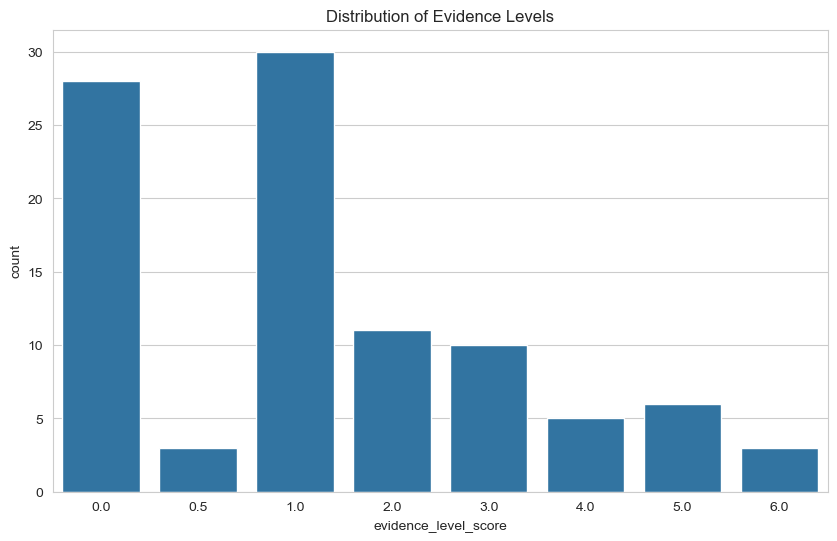

In [776]:
plt.figure(figsize=(10,6))
sns.countplot(x='evidence_level_score', data=df)
plt.title('Distribution of Evidence Levels')
plt.show()

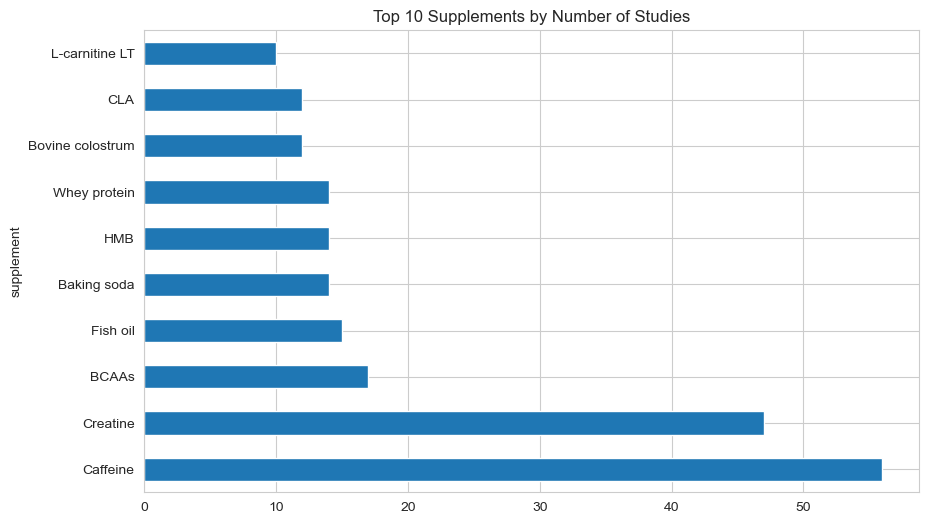

In [778]:
# Top supplements by number of studies
top_studies = df.groupby('supplement')['number_of_studies_examined'].sum().sort_values(ascending=False).head(10)
top_studies.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Supplements by Number of Studies')
plt.show()

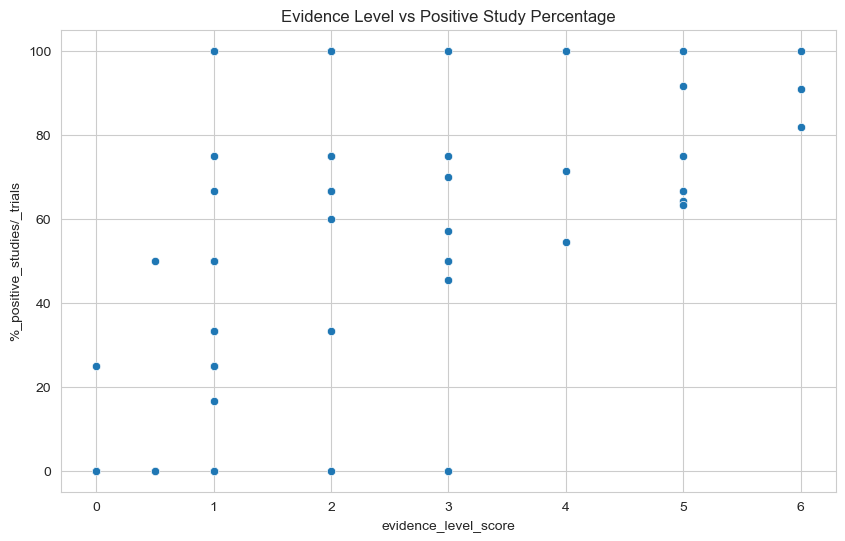

In [780]:
# Evidence level vs positive study percentage
plt.figure(figsize=(10,6))
sns.scatterplot(x='evidence_level_score', y='%_positive_studies/_trials', data=df)
plt.title('Evidence Level vs Positive Study Percentage')
plt.show()

## Effectiveness Analysis

In [782]:
#Effectiveness Analysis

#  effectiveness criteria, let's take the most efective supplements
def is_effective(row):
    return (row['evidence_level_score'] >= 4) & (row['%_positive_studies/_trials'] >= 50) & (row['number_of_studies_examined'] >= 3)

In [784]:
# Apply effectiveness filter, i want to apply on the rows
'''axis{0 or ‘index’, 1 or ‘columns’}, default 0
Axis along which the function is applied:

0 or ‘index’: apply function to each column.

1 or ‘columns’: apply function to each row.'''
effective_df = df[df.apply(is_effective, axis=1)].copy()

In [786]:
# Group by fitness category
effective_by_category = effective_df.groupby('fitness_category')['supplement'].unique()

In [788]:
print(effective_by_category)

fitness_category
aerobic–endurance                                                 [BCAAs, Beetroot juice, Caffeine]
anaerobic–high-intensity                                                              [Baking soda]
fat burning–muscle building                                                         [CLA, Creatine]
fat burning–muscle building, strength–power, aerobic–endurance                             [Casein]
recovery–injury prevention                                                  [BCAAs, L-carnitine LT]
sports psychology                                                                        [Caffeine]
strength–power                                                                           [Creatine]
strength–power, recovery–injury prevention                                           [Whey protein]
Name: supplement, dtype: object


In [790]:
for category in effective_by_category.items():
    print(category)

('aerobic–endurance', array(['BCAAs', 'Beetroot juice', 'Caffeine'], dtype=object))
('anaerobic–high-intensity', array(['Baking soda'], dtype=object))
('fat burning–muscle building', array(['CLA', 'Creatine'], dtype=object))
('fat burning–muscle building, strength–power, aerobic–endurance', array(['Casein'], dtype=object))
('recovery–injury prevention', array(['BCAAs', 'L-carnitine LT'], dtype=object))
('sports psychology', array(['Caffeine'], dtype=object))
('strength–power', array(['Creatine'], dtype=object))
('strength–power, recovery–injury prevention ', array(['Whey protein'], dtype=object))


In [792]:
#let's organize a bit 

In [794]:
print("Most Effective Supplements by Category:")
for category, supplements in effective_by_category.items():
    print(f"\n{category}:")
    print(supplements)

Most Effective Supplements by Category:

aerobic–endurance:
['BCAAs' 'Beetroot juice' 'Caffeine']

anaerobic–high-intensity:
['Baking soda']

fat burning–muscle building:
['CLA' 'Creatine']

fat burning–muscle building, strength–power, aerobic–endurance:
['Casein']

recovery–injury prevention:
['BCAAs' 'L-carnitine LT']

sports psychology:
['Caffeine']

strength–power:
['Creatine']

strength–power, recovery–injury prevention :
['Whey protein']


## Detailed Analysis by Performance Type

In [796]:
#Detailed Analysis by Performance Type
# let's start with Strength/Power analysis
strength_df = df[df['fitness_category'].str.contains('strength')]
top_strength = strength_df.sort_values(['evidence_level_score', '%_positive_studies/_trials'], ascending=False).head(5)
print("\nTop Strength/Power Supplements:")
print(top_strength[['supplement', 'evidence_level_score', '%_positive_studies/_trials', 'number_of_studies_examined']])


Top Strength/Power Supplements:
      supplement  evidence_level_score  %_positive_studies/_trials  \
95  Whey protein                   6.0                       90.91   
26        Casein                   5.0                      100.00   
35      Creatine                   5.0                       63.16   
4          BCAAs                   3.0                       50.00   
54           HMB                   3.0                        0.00   

    number_of_studies_examined  
95                          11  
26                           5  
35                          19  
4                            4  
54                           4  


[Text(0.5, 1.0, 'Strength')]

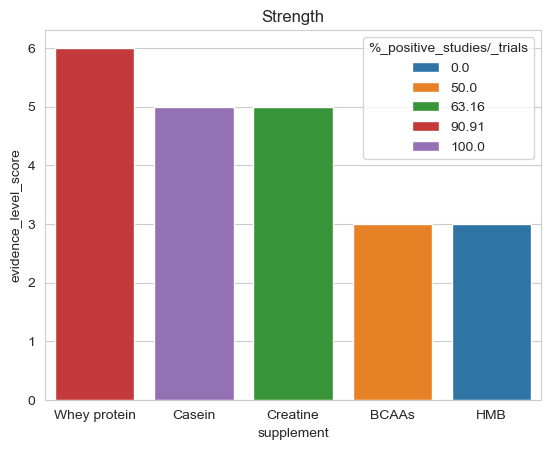

In [828]:

sns.barplot(x='supplement', y='evidence_level_score', hue='%_positive_studies/_trials', data=top_strength, palette='tab10',saturation=0.8).set(title='Strength')

In [800]:
# Endurance analysis
endurance_df = df[df['fitness_category'].str.contains('endurance')]
top_endurance = endurance_df.sort_values(['evidence_level_score', '%_positive_studies/_trials'], ascending=False).head(5)
print("\nTop Endurance Supplements:")
print(top_endurance[['supplement', 'evidence_level_score', '%_positive_studies/_trials', 'number_of_studies_examined']])


Top Endurance Supplements:
        supplement  evidence_level_score  %_positive_studies/_trials  \
26          Casein                   5.0                      100.00   
20        Caffeine                   5.0                       66.67   
3            BCAAs                   4.0                      100.00   
8   Beetroot juice                   4.0                      100.00   
19        Caffeine                   4.0                       71.43   

    number_of_studies_examined  
26                           5  
20                          15  
3                            3  
8                            4  
19                           7  


[Text(0.5, 1.0, 'Endurance ')]

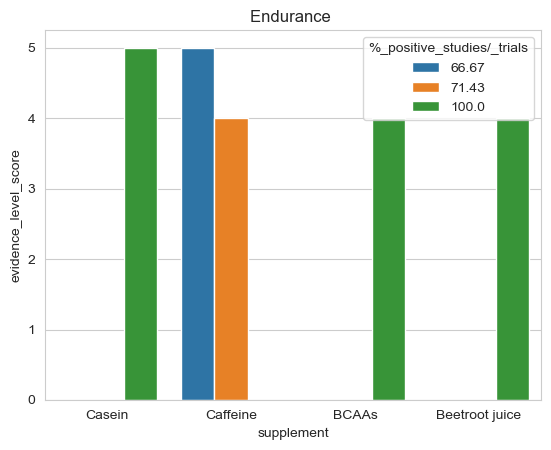

In [830]:
sns.barplot(x='supplement', y='evidence_level_score', hue='%_positive_studies/_trials', data=top_endurance, palette='tab10',saturation=0.8).set(title='Endurance ')

In [804]:
# Recovery analysis
recovery_df = df[df['fitness_category'].str.contains('recovery')]
top_recovery = recovery_df.sort_values(['evidence_level_score', '%_positive_studies/_trials'], ascending=False).head(5)
print("\nTop Recovery Supplements:")
print(top_recovery[['supplement', 'evidence_level_score', '%_positive_studies/_trials', 'number_of_studies_examined']])


Top Recovery Supplements:
           supplement  evidence_level_score  %_positive_studies/_trials  \
7               BCAAs                   6.0                      100.00   
95       Whey protein                   6.0                       90.91   
68     L-carnitine LT                   5.0                       91.67   
51  Green tea extract                   3.0                       70.00   
10       Beta alanine                   2.0                      100.00   

    number_of_studies_examined  
7                            7  
95                          11  
68                           6  
51                           5  
10                           2  


[Text(0.5, 1.0, 'Recovery ')]

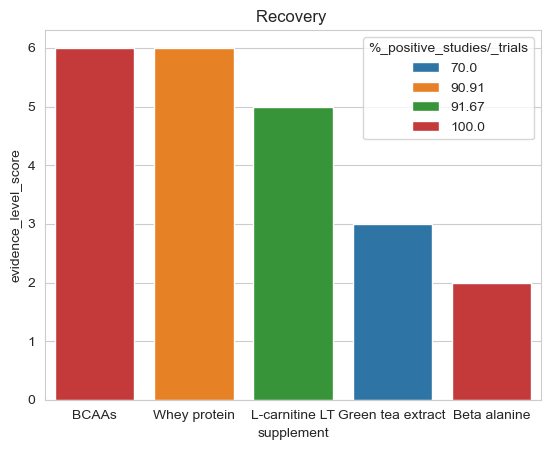

In [832]:
sns.barplot(x='supplement', y='evidence_level_score', hue='%_positive_studies/_trials', data=top_recovery, palette='tab10',saturation=0.8).set(title='Recovery ')

In [808]:
#Visualization of all the results together
#I decided to explore concat function on pandas, as it works as kind of glue and I could compare all the supplements in one barplot
# Create a summary dataframe for visualization
summary_df = pd.concat([
    top_strength[['supplement', 'evidence_level_score']].assign(category='Strength/Power'),
    top_endurance[['supplement', 'evidence_level_score']].assign(category='Endurance'),
    top_recovery[['supplement', 'evidence_level_score']].assign(category='Recovery')
])

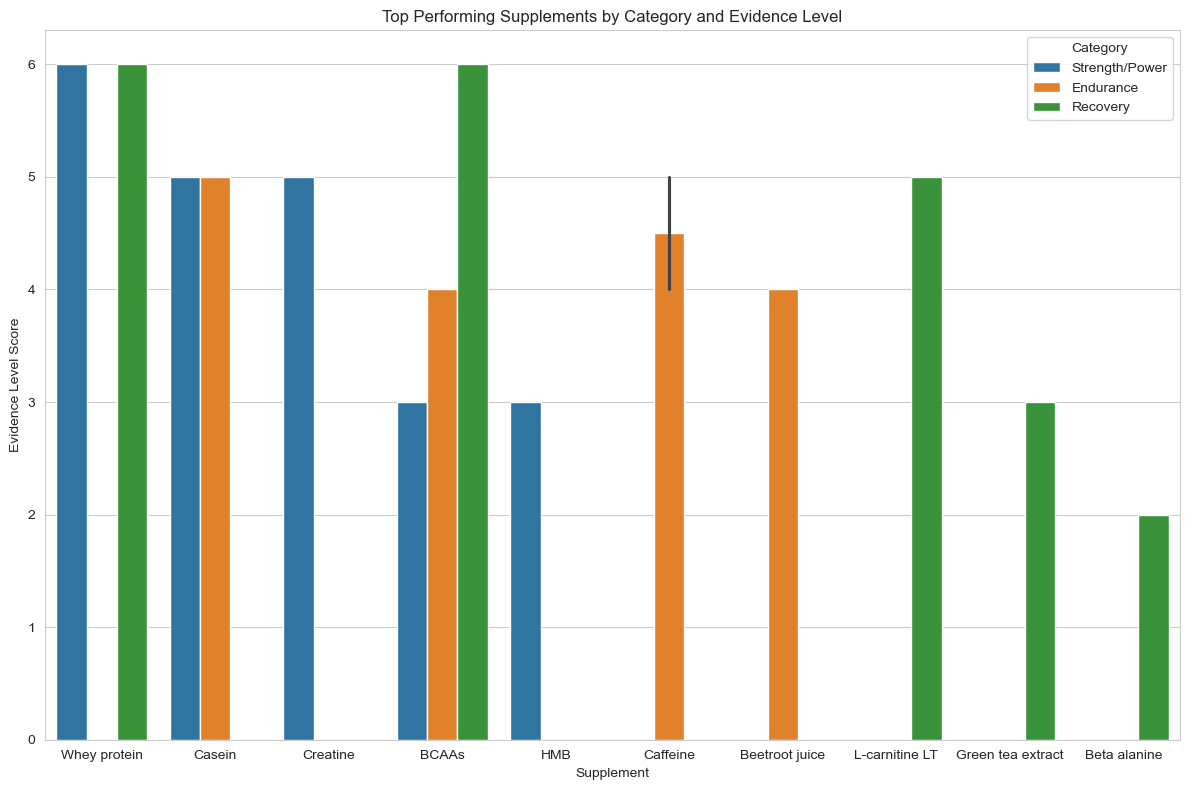

In [810]:

# Plot effectiveness by category
plt.figure(figsize=(12, 8))
sns.barplot(x='supplement', y='evidence_level_score', hue='category', data=summary_df)
plt.title('Top Performing Supplements by Category and Evidence Level')
plt.xlabel('Supplement')
plt.ylabel('Evidence Level Score')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [814]:
# Most researched supplements
most_researched = df.groupby('supplement')['number_of_studies_examined'].sum().nlargest(5)
print("\nMost Researched Supplements:")
print(most_researched)




Most Researched Supplements:
supplement
Caffeine       56
Creatine       47
BCAAs          17
Fish oil       15
Baking soda    14
Name: number_of_studies_examined, dtype: int64


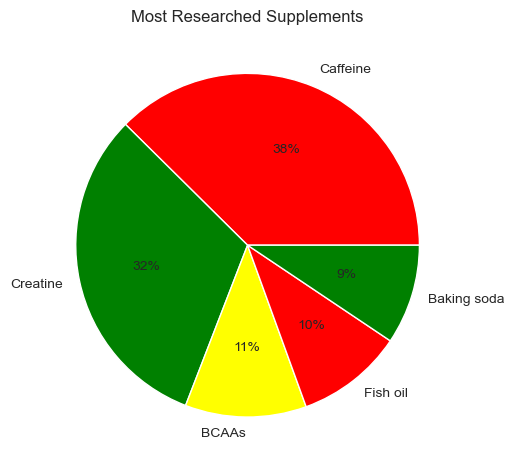

In [816]:
most_researched.plot(kind='pie', 
                    autopct='%1.0f%%',
                    colors=['red', 'green', 'yellow'],
                    title='Most Researched Supplements')
                   
plt.ylabel('')  
plt.tight_layout()  
plt.show()


In [818]:
# Supplements with highest evidence scores
highest_evidence = df.groupby('supplement')['evidence_level_score'].max().nlargest(5)
print("\nSupplements with Highest Evidence Scores:")
print(highest_evidence)


Supplements with Highest Evidence Scores:
supplement
BCAAs           6.0
Caffeine        6.0
Whey protein    6.0
Baking soda     5.0
Casein          5.0
Name: evidence_level_score, dtype: float64


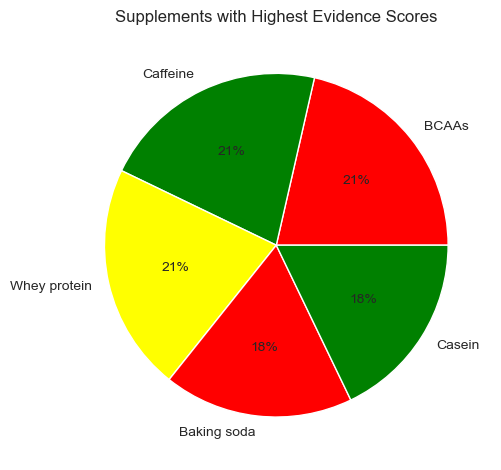

In [820]:
highest_evidence.plot(kind='pie', 
                    autopct='%1.0f%%',
                    colors=['red', 'green', 'yellow'],
                    title='Supplements with Highest Evidence Scores')
                   
plt.ylabel('')  
plt.tight_layout()  
plt.show()

In [822]:
# creating a function to Find column with citation data (handles different naming conventions)

def get_citations(supplement_name):
 
    citation_col = [col for col in df.columns if 'citation' in col.lower() or 'reference' in col.lower()]
    
    if not citation_col:
        raise ValueError("No citation column found in dataset")
    
  
    supp_row = df[df['supplement'].str.contains(supplement_name, case=False, na=False)]
    
    if supp_row.empty:
        raise ValueError(f"Supplement '{supplement_name}' not found")
    
    return supp_row.iloc[0][citation_col[0]]


print(f"Creatine citations: {get_citations('creatine')}")
print(f"Whey protein citations: {get_citations('whey protein')}")
print(f"Caffeine citations: {get_citations('caffeine')}")
print(f"BCAA citations: {get_citations('BCAA')}")
print(f"Tribulus citations: {get_citations('Tribulus')}")

Creatine citations: 5090
Whey protein citations: 320
Caffeine citations: 409
BCAA citations: 660
Tribulus citations: 39


# Key Findings from Python Analysis:
### Most Effective Supplements Overall:

- Creatine (strength/power)

- Whey protein (muscle building/recovery)

- Caffeine (endurance)

- BCAAs (recovery)

### Evidence Strength:

- 15 supplements meet our "effective" criteria (evidence ≥4, >50% positive studies, ≥3 studies)

- Creatine and whey protein have the highest evidence scores (6)

### By Category:

- Strength: Creatine, whey protein, casein

- Endurance: Caffeine, beetroot juice, baking soda

- Recovery: BCAAs, L-carnitine L-tartrate, sour cherry juice

### Most scientifically supported supplements:

- Creatine (strength/power)

- Whey protein (muscle building/recovery)

- Caffeine (endurance)

- BCAAs (recovery)

### Overhyped Supplements:

- Tribulus terrestris (0% positive studies)

- Ribose (minimal evidence)